In [447]:
library(corrplot)
library(PerformanceAnalytics)
library(ggplot2)
library(FactoMineR)
library(factoextra)
library(dplyr)
library(lattice)
library(cluster)
library(visreg)
library(car)
library(tidyr)
library(caret)
library(forcats) # fct_recode function
library(repr)    # for figure size
library(randomForest)

In [448]:
is.Date <- function(x) inherits(x, 'Date')

In [449]:
# library(summarytools)

# Importation du fichier

In [450]:
trainfull_origin <- read.csv('origin-trainfull.csv', row.names=1)
test_origin <- read.csv('origin-test.csv', row.names=1)
trainfull = trainfull_origin

In [451]:
options(repr.matrix.max.cols=200)
head(trainfull)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [452]:
cat("nombre d'input : ", nrow(trainfull))
cat('\n')
cat("nombre de features : ", ncol(trainfull))

nombre d'input :  1460
nombre de features :  80

## Rechercher des colonnes quantitatives et catégorielles

In [453]:
trainfull_quant = select_if(trainfull, is.numeric)
trainfull_qual = select_if(trainfull, is.factor)
cat('nombre de variables quantitatives : ', ncol(trainfull_quant))
cat('\n')
cat('nombre de variables catégorielles : ', ncol(trainfull_qual))

nombre de variables quantitatives :  37
nombre de variables catégorielles :  43

## Observation des features

In [454]:
summary(trainfull)

   MSSubClass       MSZoning     LotFrontage        LotArea        Street    
 Min.   : 20.0   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:   6  
 1st Qu.: 20.0   FV     :  65   1st Qu.: 59.00   1st Qu.:  7554   Pave:1454  
 Median : 50.0   RH     :  16   Median : 69.00   Median :  9478              
 Mean   : 56.9   RL     :1151   Mean   : 70.05   Mean   : 10517              
 3rd Qu.: 70.0   RM     : 218   3rd Qu.: 80.00   3rd Qu.: 11602              
 Max.   :190.0                  Max.   :313.00   Max.   :215245              
                                NA's   :259                                  
  Alley      LotShape  LandContour  Utilities      LotConfig    LandSlope 
 Grvl:  50   IR1:484   Bnk:  63    AllPub:1459   Corner : 263   Gtl:1382  
 Pave:  41   IR2: 41   HLS:  50    NoSeWa:   1   CulDSac:  94   Mod:  65  
 NA's:1369   IR3: 10   Low:  36                  FR2    :  47   Sev:  13  
             Reg:925   Lvl:1311                  FR3    :   4             
 

# Traitement des features

## Variables pas vraiment numériques -> conversion en date

- YearBuilt
- YearRemodAdd
- GarageYrBlt
- MoSold
- YrSold

In [455]:
trainfull$YearBuilt <- as.Date(
    ISOdate(trainfull[, 'YearBuilt'], 01, 01), format = "%Y")
trainfull$YearRemodAdd <- as.Date(
    ISOdate(trainfull[, 'YearRemodAdd'], 01, 01), format = "%Y")
trainfull$GarageYrBlt <- as.Date(
    ISOdate(trainfull[, 'GarageYrBlt'], 01, 01), format = "%Y")
trainfull$YrSold <- as.Date(
    ISOdate(trainfull[, 'YrSold'], trainfull[, 'MoSold'], 01), format = "%Y")

trainfull = select(trainfull, -MoSold)

## Variable non quantitative -> conversion en qualitative

In [456]:
trainfull$MSSubClass <- factor(trainfull$MSSubClass)

## Variables ordinales transformables :

|    Feature       |       Levels      | Score Possibilty  |
|:-----------------|:-----------------:|:-----------------:|
|LotShape                    |irregular -> regular        |1 to 4|
|LandContour                 |depression -> flat           |1 to 4|
|Utilities                   |electricity only -> all      |1 to 4|
|LandSlope                   |sever -> gentle              |1 to 3|
|ExterQual                   |poor -> excellent            |1 to 5|
|ExterCond                   |poor -> excellent            |1 to 5|
|BsmtQual                    |poor -> excellent            |1 to 5|
|BsmtCond                    |poor -> excellent            |1 to 5|
|BsmtExposure                |no -> good                   |1 to 4|
|BsmtFinType1                |unfinished -> good           |1 to 6|
|BsmtFinType2                |unfinished -> good           |1 to 6|    
|HeatingQC                   |poor -> excellent            |1 to 5|
|CentralAir                  |no / yes                     |0 / 1 |
|Electrical                  |poor -> standard             |1 to 5|
|KitchenQual                 |poor -> excellent            |1 to 5|
|Functional                  |salvage -> typical           |1 to 8|
|FireplaceQu                 |poor -> excellent            |1 to 5|
|GarageFinish                |unfinished -> finshed        |1 to 3|
|GarageQual                  |poor -> excellent            |1 to 5|
|GarageCond                  |poor -> excellent            |1 to 5|
|PavedDrive                  |dirt -> paved                |1 to 3|
|PoolQC                      |fair -> excellent            |1 to 4|
|Fence                       |none -> good                 |1 to 5|

In [457]:
trainfull$LotShape <- fct_recode(trainfull$LotShape,
                   '1' = 'IR3', '2' = 'IR2', '3' = 'IR1', '4' = 'Reg')
trainfull$LotShape <- as.numeric(as.character(trainfull$LotShape))

In [458]:
trainfull$LandContour <- trainfull$LandContour %>%
    fct_recode('1' = 'Low', '2' = 'HLS', '3' = 'Bnk', '4' = 'Lvl')
trainfull$LandContour <- as.numeric(as.character(trainfull$LandContour))

In [459]:
trainfull$Utilities <- trainfull$Utilities %>%
    fct_recode('1' = 'ELO', '2' = 'NoSeWa', '3' = 'NoSewr', '4' = 'AllPub')
trainfull$Utilities <- as.numeric(as.character(trainfull$Utilities))

Warning message:
"Unknown levels in `f`: ELO, NoSewr"

In [460]:
trainfull$LandSlope <- trainfull$LandSlope %>%
    fct_recode('1' = 'Sev', '2' = 'Mod', '3' = 'Gtl')
trainfull$LandSlope <- as.numeric(as.character(trainfull$LandSlope))

In [461]:
trainfull$ExterQual <- trainfull$ExterQual %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$ExterQual <- as.numeric(as.character(trainfull$ExterQual))

Warning message:
"Unknown levels in `f`: Po"

In [462]:
trainfull$ExterCond <- trainfull$ExterCond %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$ExterCond <- as.numeric(as.character(trainfull$ExterCond))

In [463]:
trainfull$BsmtQual <- trainfull$BsmtQual %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$BsmtQual <- as.numeric(as.character(trainfull$BsmtQual))

Warning message:
"Unknown levels in `f`: Po"

In [464]:
trainfull$BsmtCond  <- trainfull$BsmtCond  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$BsmtCond  <- as.numeric(as.character(trainfull$BsmtCond))

Warning message:
"Unknown levels in `f`: Ex"

In [465]:
trainfull$BsmtExposure  <- trainfull$BsmtExposure  %>%
    fct_recode('1' = 'No', '2' = 'Mn', '3' = 'Av', '4' = 'Gd')
trainfull$BsmtExposure  <- as.numeric(as.character(trainfull$BsmtExposure))

In [466]:
trainfull$BsmtFinType1  <- trainfull$BsmtFinType1  %>%
    fct_recode('1' = 'Unf', '2' = 'LwQ', '3' = 'Rec',
               '4' = 'BLQ', '5' = 'ALQ', '6' = 'GLQ')
trainfull$BsmtFinType1  <- as.numeric(as.character(trainfull$BsmtFinType1))

In [467]:
trainfull$BsmtFinType2  <- trainfull$BsmtFinType2  %>%
    fct_recode('1' = 'Unf', '2' = 'LwQ', '3' = 'Rec',
               '4' = 'BLQ', '5' = 'ALQ', '6' = 'GLQ')
trainfull$BsmtFinType2  <- as.numeric(as.character(trainfull$BsmtFinType2))

In [468]:
trainfull$HeatingQC  <- trainfull$HeatingQC  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$HeatingQC  <- as.numeric(as.character(trainfull$HeatingQC))

In [469]:
trainfull$CentralAir  <- trainfull$CentralAir  %>%
    fct_recode('0' = 'N', '1' = 'Y')
trainfull$CentralAir  <- as.numeric(as.character(trainfull$CentralAir))

In [470]:
trainfull$Electrical  <- trainfull$Electrical  %>%
    fct_recode('1' = 'Mix', '2' = 'FuseP', '3' = 'FuseF', '4' = 'FuseA', '5' = 'SBrkr')
trainfull$Electrical  <- as.numeric(as.character(trainfull$Electrical))

In [471]:
trainfull$KitchenQual  <- trainfull$KitchenQual  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$KitchenQual  <- as.numeric(as.character(trainfull$KitchenQual))

Warning message:
"Unknown levels in `f`: Po"

In [472]:
trainfull$Functional <- trainfull$Functional  %>%
    fct_recode('1' = 'Sal', '2' = 'Sev', '3' = 'Maj2', '4' = 'Maj1',
               '5' = 'Mod', '6' = 'Min2', '7' = 'Min1', '8' = 'Typ')
trainfull$Functional <- as.numeric(as.character(trainfull$Functional))

Warning message:
"Unknown levels in `f`: Sal"

In [473]:
#trainfull$FireplaceQu  <- trainfull$FireplaceQu  %>%
#    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
#trainfull$FireplaceQu  <- as.numeric(as.character(trainfull$FireplaceQu))

In [474]:
#trainfull$GarageFinish  <- trainfull$GarageFinish  %>%
#    fct_recode('1' = 'Unf', '2' = 'RFn', '3' = 'Fin')
#trainfull$GarageFinish  <- as.numeric(as.character(trainfull$GarageFinish))

In [475]:
trainfull$GarageQual  <- trainfull$GarageQual  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$GarageQual  <- as.numeric(as.character(trainfull$GarageQual))

In [476]:
trainfull$GarageCond  <- trainfull$GarageCond  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
trainfull$GarageCond  <- as.numeric(as.character(trainfull$GarageCond))

In [477]:
trainfull$PavedDrive  <- trainfull$PavedDrive  %>%
    fct_recode('1' = 'N', '2' = 'P', '3' = 'Y')
trainfull$PavedDrive  <- as.numeric(as.character(trainfull$PavedDrive))

In [478]:
#trainfull$PoolQC  <- trainfull$PoolQC  %>%
#    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
#trainfull$PoolQC  <- as.numeric(as.character(trainfull$PoolQC))

In [479]:
#trainfull$Fence  <- trainfull$Fence  %>%
#    fct_recode('1' = 'MnWw', '2' = 'GdWo', '3' = 'MnPrv', '4' = 'GdPrv')
#trainfull$Fence  <- as.numeric(as.character(trainfull$Fence))

## Modalités avec peu de données

In [480]:
nzv <- nearZeroVar(trainfull, saveMetrics = TRUE)
nzv[which(nzv$nzv == TRUE | nzv$zeroVar == TRUE),]

,freqRatio,percentUnique,zeroVar,nzv
,<dbl>,<dbl>,<lgl>,<lgl>
Street,242.33333,0.1369863,FALSE,TRUE
LandContour,20.80952,0.2739726,FALSE,TRUE
Utilities,1459.00000,0.1369863,FALSE,TRUE
LandSlope,21.26154,0.2054795,FALSE,TRUE
Condition2,240.83333,0.5479452,FALSE,TRUE
RoofMatl,130.36364,0.5479452,FALSE,TRUE
BsmtCond,20.16923,0.2739726,FALSE,TRUE
BsmtFinType2,23.25926,0.4109589,FALSE,TRUE
BsmtFinSF2,258.60000,9.8630137,FALSE,TRUE


## Features avec beaucoup de 0 (3rd quartile = 0)

- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- X3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

other nearzero alerts

- LandContour
- LandSlope
- BsmtCond
- BsmtFinType2
- KitchenAbvGr
- Functional
- GarageQual
- GarageCond

In [481]:
trainfull <- select(trainfull,
                    - BsmtFinSF2,
                    - LowQualFinSF,
                    - EnclosedPorch,
                    - X3SsnPorch,
                    - ScreenPorch,
                    - PoolArea,
                    - MiscVal,
                    - LandContour,
                    - LandSlope,
                    - BsmtCond,
                    - BsmtFinType2,
                    - KitchenAbvGr,
                    - Functional,
                    - GarageQual,
                    - GarageCond
                   )

## Détails 


|    Feature       |       Modalité    |     Possibilty         |
|:-----------------|:-----------------:|:-----------------------|
|Street            |gravel = 6         |-> supprimer feature    |
|Utilities         |Mode = 1459        |-> supprimer feature    |
|LotConfig         |3frontages = 4     |-> supprimer lignes     |
|Condition2        |mode = 1445/1460   |-> supprimer feature    |
|RoofMatl          |Mode = 1434/1460   |-> RoofMatl 0/1         |
|Foundation        |Wood= 3, stone= 6  |-> supprimer lignes     |
|Heating           |Mode = 1428/1460   |-> convertir en 0/1     |
|Electrical        |Mix=1, fuseP=1     |-> supprimer lignes (finalement conservé car converti en numérique)    |
|GarageType        |2Types=6, carport=9|-> supprimer lignes     |
|MiscFeature       |Mode = 1406/1460   |-> convertir en 0/1     |
|SaleCondition     |AdjLand=4          |-> supprimer lignes     |




In [482]:
# trainfull <- select(trainfull, -Street, -Utilities, -Condition2, -MiscFeature)
trainfull <- select(trainfull, -Street, -Utilities, -Condition2)

In [483]:
#trainfull <- trainfull[-which(trainfull$LotConfig == 'FR3' |
#      trainfull$Foundation == 'Wood' | trainfull$Foundation == 'Stone' |
#      trainfull$GarageType == '2Types' | trainfull$GarageType == 'carport' |
#      trainfull$SaleCondition == 'AdjLand'),]

In [484]:
trainfull$Heating  <- trainfull$Heating  %>%
    fct_recode('0' = 'GasA',
               '1' = 'Floor', '1' = 'GasW', '1' = 'Grav',
               '1' = 'OthW', '1' = 'Wall')
trainfull$Heating  <- as.numeric(as.character(trainfull$Heating))

In [485]:
trainfull$RoofMatl  <- trainfull$RoofMatl  %>%
    fct_recode('0' = 'CompShg',
               '1' = 'ClyTile', '1' = 'Membran', '1' = 'Metal',
               '1' = 'Roll', '1' = 'Tar&Grv', '1' = 'WdShake', '1' = 'WdShngl')
trainfull$RoofMatl  <- as.numeric(as.character(trainfull$RoofMatl))

In [486]:
levels(trainfull$MiscFeature) <- c(levels(trainfull$MiscFeature), 'None')
trainfull$MiscFeature[which(is.na(trainfull$MiscFeature))] <- 'None'
trainfull$MiscFeature <- trainfull$MiscFeature  %>%
    fct_recode('0' = 'None',
               '1' = 'Elev', '1' = 'Gar2', '1' = 'Othr',
               '1' = 'Shed', '1' = 'TenC')
trainfull$MiscFeature <- as.numeric(as.character(trainfull$MiscFeature))

Warning message:
"Unknown levels in `f`: Elev"

In [487]:
for (i in 1:ncol(trainfull)){
    na_number <- length(which(is.na(trainfull[, i])))
    if (na_number > 0){
        cat(na_number, colnames(select(trainfull, i)),'\n')
    }
}

259 LotFrontage 
1369 Alley 
8 MasVnrType 
8 MasVnrArea 
37 BsmtQual 
38 BsmtExposure 
37 BsmtFinType1 
1 Electrical 
690 FireplaceQu 
81 GarageType 
81 GarageYrBlt 
81 GarageFinish 
1453 PoolQC 
1179 Fence 


## Données manquantes

|NA's  |Feature      | Possibility |
|-----:|:------------|:------------|
|  257 |LotFrontage  |-> supprimer lignes
| 1350 |Alley        |-> Créer modalité None
|    8 |MasVnrType   |-> supprimer
|    8 |MasVnrArea   |-> supprimer
|   37 |BsmtQual     |-> supprimer
|   36 |BsmtCond     |-> supprimer
|   37 |BsmtExposure |-> supprimer
|   36 |BsmtFinType1 |-> supprimer
|   37 |BsmtFinType2 |-> supprimer
|    1 |Electrical   |-> supprimer
|  673 |FireplaceQu  |-> Créer modalité None
|   78 |GarageType   |-> supprimer feature si corrélée à une autre
|   78 |GarageYrBlt  |-> mettre la valeur de YearBuilt
|   78 |GarageFinish |-> Créer modalité None
| 1430 |PoolQC       |-> Créer modalité None
| 1161 |Fence        |-> Créer modalité None

In [488]:
levels(trainfull$Alley) <- c(levels(trainfull$Alley), 'None')
trainfull$Alley[which(is.na(trainfull$Alley))] <- 'None'

In [489]:
levels(trainfull$FireplaceQu) <- c(levels(trainfull$FireplaceQu), 'None')
trainfull$FireplaceQu[which(is.na(trainfull$FireplaceQu))] <- 'None'

In [490]:
levels(trainfull$GarageType) <- c(levels(trainfull$GarageType), 'None')
trainfull$GarageType[which(is.na(trainfull$GarageType))] <- 'None'

In [491]:
levels(trainfull$GarageFinish) <- c(levels(trainfull$GarageFinish), 'None')
trainfull$GarageFinish[which(is.na(trainfull$GarageFinish))] <- 'None'

In [492]:
levels(trainfull$PoolQC) <- c(levels(trainfull$PoolQC), 'None')
trainfull$PoolQC[which(is.na(trainfull$PoolQC))] <- 'None'

In [493]:
levels(trainfull$Fence) <- c(levels(trainfull$Fence), 'None')
trainfull$Fence[which(is.na(trainfull$Fence))] <- 'None'

In [494]:
#trainfull <- trainfull[which(!is.na(trainfull$LotFrontage)),]
#trainfull <- trainfull[which(!is.na(trainfull$MasVnrType)),]
#trainfull <- trainfull[which(!is.na(trainfull$MasVnrArea)),]
#trainfull <- trainfull[which(!is.na(trainfull$BsmtQual)),]
#trainfull <- trainfull[which(!is.na(trainfull$BsmtExposure)),]
#trainfull <- trainfull[which(!is.na(trainfull$BsmtFinType1)),]
#trainfull <- trainfull[which(!is.na(trainfull$Electrical)),]

Warning message:
"Using size for a discrete variable is not advised."Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 81 rows containing missing values (geom_point)."

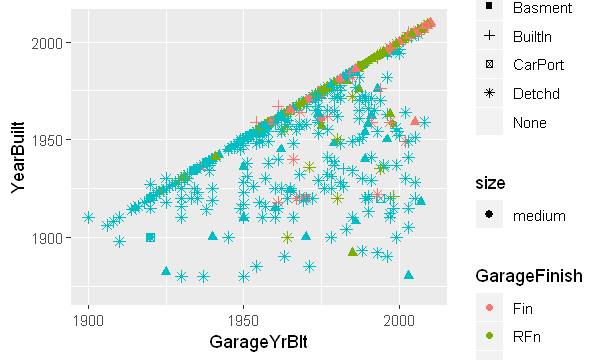

In [495]:
ggplot(trainfull, aes(GarageYrBlt, YearBuilt, color=GarageFinish, shape=GarageType, size = 'medium')) +
    geom_point()

In [496]:
NA_lines = which(is.na(trainfull$GarageYrBlt))
trainfull$GarageYrBlt[NA_lines] <- trainfull$YearBuilt[NA_lines]

### Traitement des données NA restantes
* var quantitative -> mise à 0
* var qualitative -> mise au Mode

In [497]:
for (i in 1:ncol(trainfull)){
    na_number <- length(which(is.na(trainfull[, i])))
    if (na_number > 0){
        if (is.null(levels(trainfull[,i]))){
        trainfull[which(is.na(trainfull[, i])), i] <- median(trainfull[, i], na.rm = T)
        } else {
        cat(na_number, colnames(select(trainfull, i)),'NA lines : ', which(is.na(trainfull[, i])), '\n')
        print(table(select(trainfull, i)))
        print('------------------------------------------------------------------------')
        }
    }
}

8 MasVnrType NA lines :  235 530 651 937 974 978 1244 1279 

 BrkCmn BrkFace    None   Stone 
     15     445     864     128 
[1] "------------------------------------------------------------------------"


In [498]:
trainfull$MasVnrType[which(is.na(trainfull$MasVnrType))] <- 'None'

In [499]:
for (i in 1:ncol(trainfull)){
    na_number <- length(which(is.na(trainfull[, i])))
    if (na_number > 0){
        cat(na_number, colnames(select(trainfull, i)),'NA lines : ', which(is.na(trainfull[, i])), '\n')
    }
}

## Vérification si plus de données manquantes

In [500]:
for (i in 1:ncol(trainfull)){
    na_number <- length(which(is.na(trainfull[, i])))
    if (na_number > 0){
        cat(na_number, colnames(select(trainfull, i)),'\n')
    }
}

In [501]:
median(trainfull$LotFrontage, na.rm = T)

[1] 69

In [502]:
summary(trainfull)

   MSSubClass     MSZoning     LotFrontage        LotArea        Alley     
 20     :536   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:  50  
 60     :299   FV     :  65   1st Qu.: 60.00   1st Qu.:  7554   Pave:  41  
 50     :144   RH     :  16   Median : 69.00   Median :  9478   None:1369  
 120    : 87   RL     :1151   Mean   : 69.86   Mean   : 10517              
 30     : 69   RM     : 218   3rd Qu.: 79.00   3rd Qu.: 11602              
 160    : 63                  Max.   :313.00   Max.   :215245              
 (Other):262                                                               
    LotShape       LotConfig     Neighborhood   Condition1     BldgType   
 Min.   :1.000   Corner : 263   NAmes  :225   Norm   :1260   1Fam  :1220  
 1st Qu.:3.000   CulDSac:  94   CollgCr:150   Feedr  :  81   2fmCon:  31  
 Median :4.000   FR2    :  47   OldTown:113   Artery :  48   Duplex:  52  
 Mean   :3.592   FR3    :   4   Edwards:100   RRAn   :  26   Twnhs :  43  
 3rd Qu.:4.000   

## Résultat après nettoyage

In [503]:
head(trainfull)

MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition,SalePrice
<fct>,<fct>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<date>,<date>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<date>,<fct>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<date>,<fct>,<fct>,<int>
60,RL,65,8450,None,4,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003-01-01,2003-01-01,Gable,0,VinylSd,VinylSd,BrkFace,196,4,3,PConc,4,1,6,706,150,856,0,5,1,5,856,854,1710,1,0,2,1,3,4,8,0,None,Attchd,2003-01-01,RFn,2,548,3,0,61,None,None,0,2008-02-01,WD,Normal,208500
20,RL,80,9600,None,4,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976-01-01,1976-01-01,Gable,0,MetalSd,MetalSd,None,0,3,3,CBlock,4,4,5,978,284,1262,0,5,1,5,1262,0,1262,0,1,2,0,3,3,6,1,TA,Attchd,1976-01-01,RFn,2,460,3,298,0,None,None,0,2007-05-01,WD,Normal,181500
60,RL,68,11250,None,3,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001-01-01,2002-01-01,Gable,0,VinylSd,VinylSd,BrkFace,162,4,3,PConc,4,2,6,486,434,920,0,5,1,5,920,866,1786,1,0,2,1,3,4,6,1,TA,Attchd,2001-01-01,RFn,2,608,3,0,42,None,None,0,2008-09-01,WD,Normal,223500
70,RL,60,9550,None,3,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915-01-01,1970-01-01,Gable,0,Wd Sdng,Wd Shng,None,0,3,3,BrkTil,3,1,5,216,540,756,0,4,1,5,961,756,1717,1,0,1,0,3,4,7,1,Gd,Detchd,1998-01-01,Unf,3,642,3,0,35,None,None,0,2006-02-01,WD,Abnorml,140000
60,RL,84,14260,None,3,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000-01-01,2000-01-01,Gable,0,VinylSd,VinylSd,BrkFace,350,4,3,PConc,4,3,6,655,490,1145,0,5,1,5,1145,1053,2198,1,0,2,1,4,4,9,1,TA,Attchd,2000-01-01,RFn,3,836,3,192,84,None,None,0,2008-12-01,WD,Normal,250000
50,RL,85,14115,None,3,Inside,Mitchel,Norm,1Fam,1.5Fin,5,5,1993-01-01,1995-01-01,Gable,0,VinylSd,VinylSd,None,0,3,3,Wood,4,1,6,732,64,796,0,5,1,5,796,566,1362,1,0,1,1,1,3,5,0,None,Attchd,1993-01-01,Unf,2,480,3,40,30,None,MnPrv,1,2009-10-01,WD,Normal,143000


In [504]:
cat("nombre d'input : ", nrow(trainfull))
cat('\n')
cat("nombre de features : ", ncol(trainfull))

nombre d'input :  1460
nombre de features :  61

In [505]:
trainfull_quant = select_if(trainfull, is.numeric)
trainfull_date = select_if(trainfull, is.Date)
trainfull_qual = select_if(trainfull, is.factor)
cat('nombre de variables quantitatives : ', ncol(trainfull_quant))
cat('\n')
cat('nombre de variables type date : ', ncol(trainfull_date))
cat('\n')
cat('nombre de variables catégorielles : ', ncol(trainfull_qual))

nombre de variables quantitatives :  37
nombre de variables type date :  4
nombre de variables catégorielles :  20

# Analyse du dataset

## Résumé par feature

In [506]:
summary(trainfull)

   MSSubClass     MSZoning     LotFrontage        LotArea        Alley     
 20     :536   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:  50  
 60     :299   FV     :  65   1st Qu.: 60.00   1st Qu.:  7554   Pave:  41  
 50     :144   RH     :  16   Median : 69.00   Median :  9478   None:1369  
 120    : 87   RL     :1151   Mean   : 69.86   Mean   : 10517              
 30     : 69   RM     : 218   3rd Qu.: 79.00   3rd Qu.: 11602              
 160    : 63                  Max.   :313.00   Max.   :215245              
 (Other):262                                                               
    LotShape       LotConfig     Neighborhood   Condition1     BldgType   
 Min.   :1.000   Corner : 263   NAmes  :225   Norm   :1260   1Fam  :1220  
 1st Qu.:3.000   CulDSac:  94   CollgCr:150   Feedr  :  81   2fmCon:  31  
 Median :4.000   FR2    :  47   OldTown:113   Artery :  48   Duplex:  52  
 Mean   :3.592   FR3    :   4   Edwards:100   RRAn   :  26   Twnhs :  43  
 3rd Qu.:4.000   

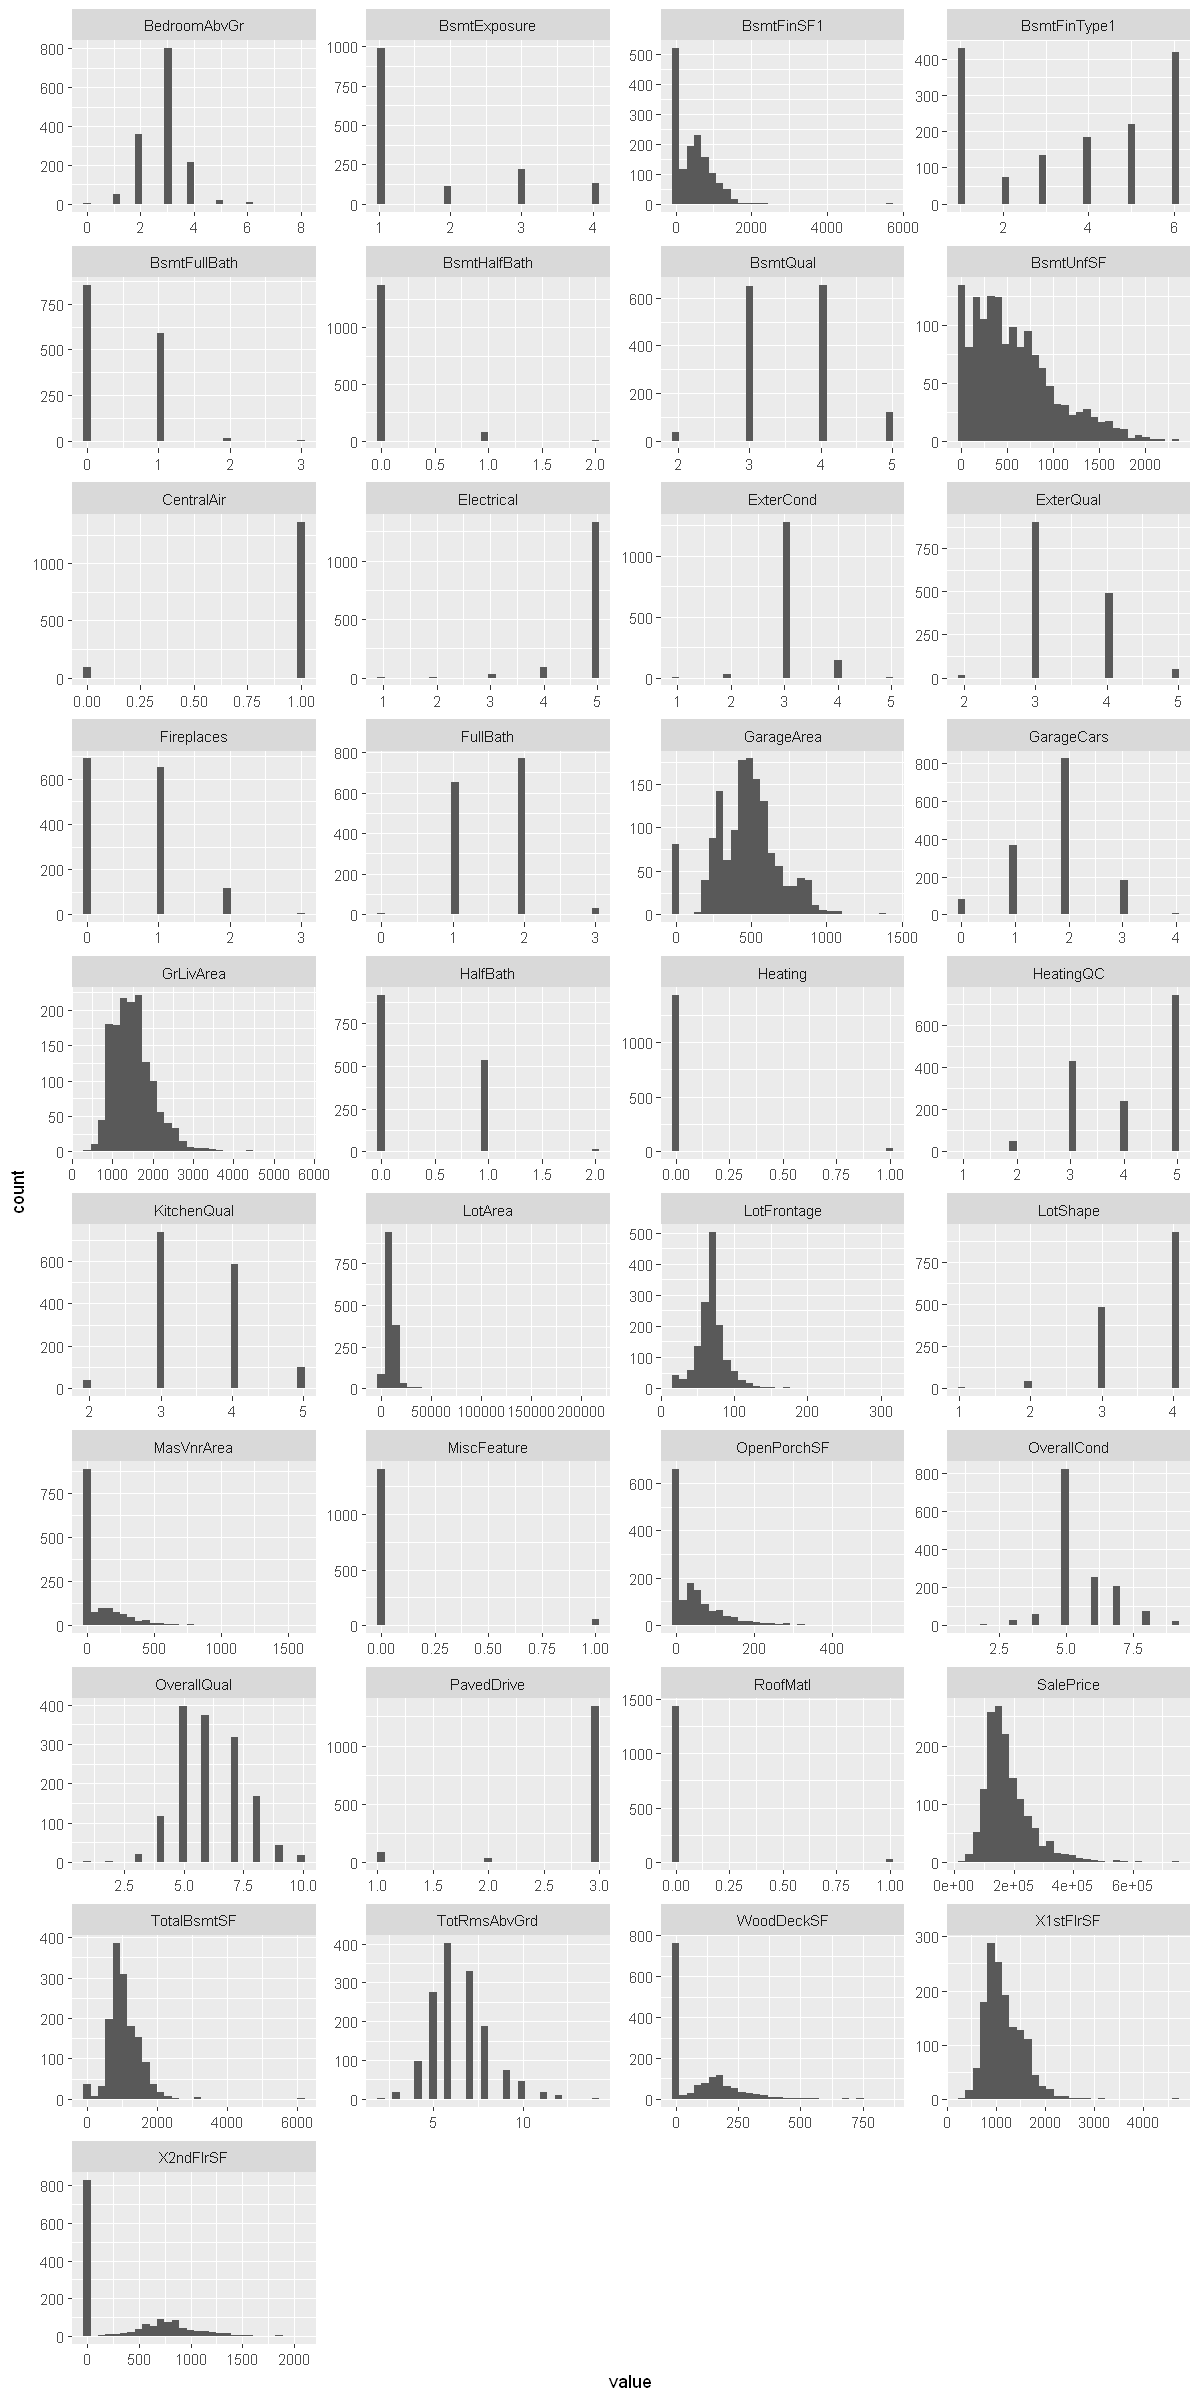

In [507]:
options(repr.plot.width = 10, repr.plot.height = 20)
ggplot(gather(trainfull_quant), aes(value)) +
       geom_histogram(bins = 30) +
       facet_wrap(~key, scales = 'free', ncol = 4)
options(repr.plot.width = 5, repr.plot.height = 3)

## Remarques :

Features avec queue de distribution -> possibilité passer en log (si pas de 0)

- BsmtFinSF1
- BsmtUNFSF
- GrLivArea
- GarageArea
- LotArea
- LotFrontage
- MasVnrArea
- OpenPorchSF
- SalePrice
- TotalBsmtSF
- WoodDeckSF
- X1stFlrSF
- X2ndFlrSF

"""
trainfull <- trainfull %>%
    #mutate(BsmtFinSF1=log(BsmtFinSF1)) %>%
    #mutate(BsmtUNFSF=log(BsmtUNFSF)) %>%
    mutate_if(GrLivArea=log(GrLivArea)) %>%
    mutate(GarageArea=log(GarageArea)) %>%
    mutate(LotArea=log(LotArea)) %>%
    mutate(LotFrontage=log(LotFrontage)) %>%
    mutate(MasVnrArea=log(MasVnrArea)) %>%
    mutate(OpenPorchSF=log(OpenPorchSF)) %>%
    mutate(SalePrice=log(SalePrice)) %>%
    mutate(TotalBsmtSF=log(TotalBsmtSF)) %>%
    mutate(WoodDeckSF=log(WoodDeckSF)) %>%
    mutate(X1stFlrSF=log(X1stFlrSF)) %>%
    mutate(X2ndFlrSF=log(X2ndFlrSF))
"""

Beaucoup de valeur à 0 qui semblent anormale -> mettre en NA / supprimer lignes / créer nouvelle feature ?
- BsmtFinSF1
- BsmtFinSF2
- MasVnrArea
- OpenPorchSF
- WoodDeckSF
- X2ndFlrSF

Warning message:
"attributes are not identical across measure variables;
they will be dropped"

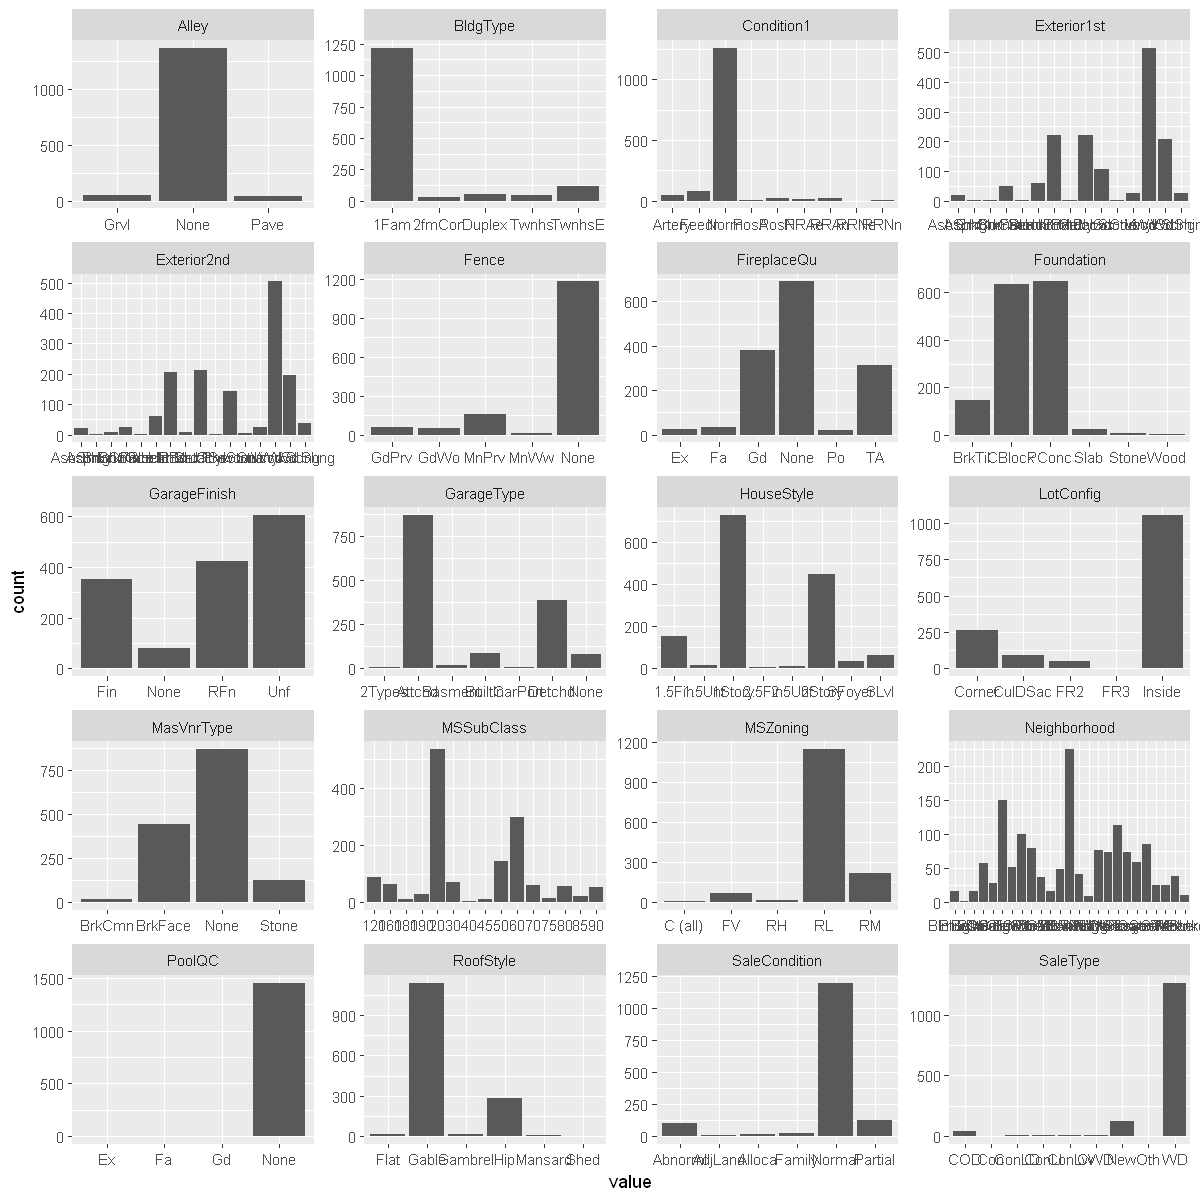

In [508]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(gather(trainfull_qual), aes(x=value)) +
    geom_bar() +
    facet_wrap(~key, scales = 'free', ncol = 4)
options(repr.plot.width = 5, repr.plot.height = 3)

## Matrice de corrélation

### Suppression des variables redondantes

In [509]:
res.cor <- cor(select(trainfull_quant, -SalePrice))
res.highcorrelated <- findCorrelation(res.cor, cutoff = 0.9, verbose = F, names = T)
res.highcorrelated

character(0)

In [510]:
#trainfull <- select(trainfull,
#                    -OverallQual,
#                    -GrLivArea,
#                    -TotalBsmtSF,
#                    -GarageCars,
#                    -ExterQual
#                   )

### Calcul de la matrice

In [511]:
trainfull_quant = select_if(trainfull, is.numeric)
trainfull_date = select_if(trainfull, is.Date)
trainfull_qual = select_if(trainfull, is.factor)
cat('nombre de variables quantitatives : ', ncol(trainfull_quant))
cat('\n')
cat('nombre de variables type date : ', ncol(trainfull_date))
cat('\n')
cat('nombre de variables catégorielles : ', ncol(trainfull_qual))

nombre de variables quantitatives :  37
nombre de variables type date :  4
nombre de variables catégorielles :  20

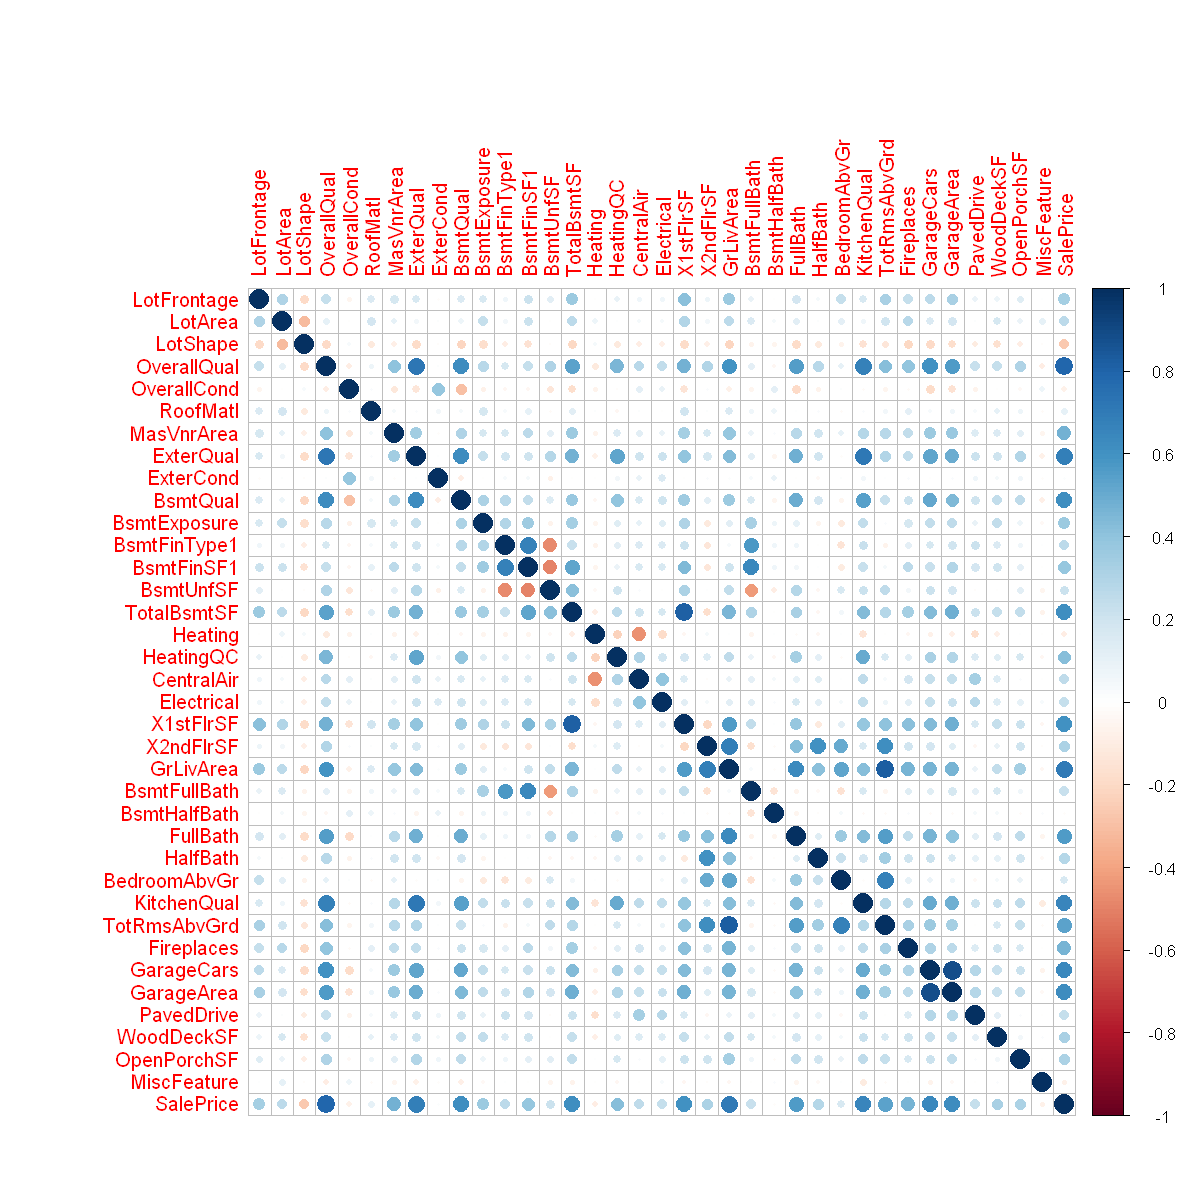

In [512]:
options(repr.plot.width = 10, repr.plot.height = 10)
res.cor <- cor(trainfull_quant)
corrplot(res.cor) # use='pairwise.complete.obs'
options(repr.plot.width = 5, repr.plot.height = 3)

## Analyse en composantes principales

In [513]:
res.pca <- PCA(trainfull_quant)

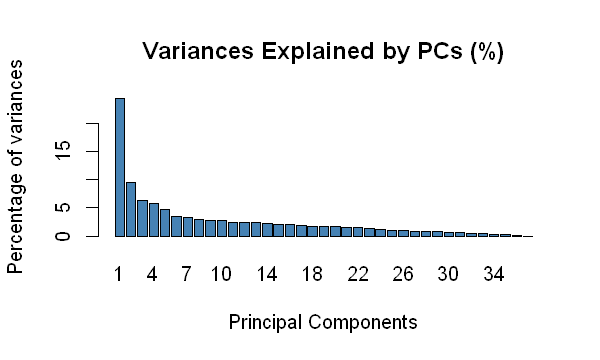

In [514]:
barplot(res.pca$eig[, 2], 
        names.arg = 1:nrow(res.pca$eig), 
        main = "Variances Explained by PCs (%)",
        xlab = "Principal Components",
        ylab = "Percentage of variances",
        col ="steelblue")

comp 1  comp 2  comp 3  comp 4  comp 5  comp 6  comp 7  comp 8  comp 9 comp 10 
     24      34      40      46      51      55      58      61      64      67 
comp 11 comp 12 comp 13 comp 14 comp 15 comp 16 comp 17 comp 18 comp 19 comp 20 
     70      72      74      76      78      80      82      84      86      88 
comp 21 comp 22 comp 23 comp 24 comp 25 comp 26 comp 27 comp 28 comp 29 comp 30 
     90      92      93      94      95      96      97      98      99     100 
comp 31 comp 32 comp 33 
    101     102     102

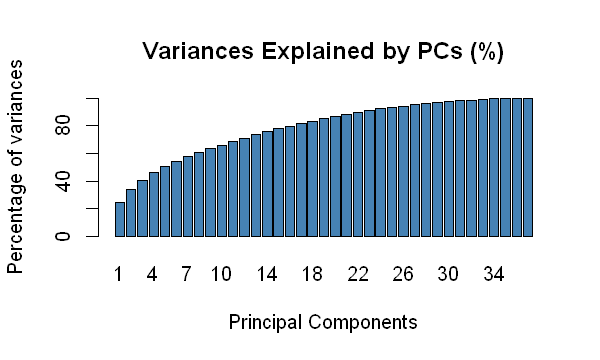

In [515]:
barplot(cumsum(res.pca$eig[, 2]), 
        names.arg = 1:nrow(res.pca$eig), 
        main = "Variances Explained by PCs (%)",
        xlab = "Principal Components",
        ylab = "Percentage of variances",
        col ="steelblue")
cumsum(round(res.pca$eig[1:33, 2]))

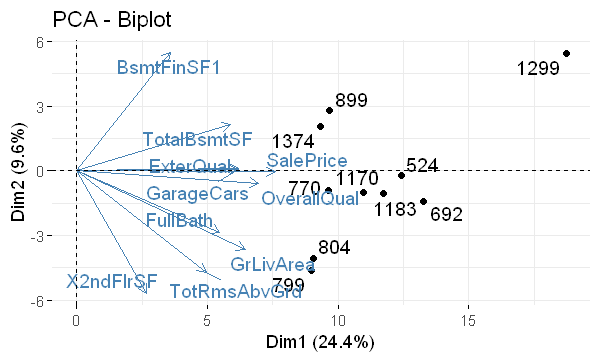

In [516]:
fviz_pca_biplot(res.pca, repel = T,
                select.var = list(contrib = 10),
                select.ind = list(contrib.ind = 10)) # , col.ind=factor(trainfull$cluster)

# Exportation du trainfull modifié

In [517]:
write.csv(trainfull, 'trainfull_modifié.csv')